# 1) Standard imports

In [66]:
import numpy as np 
import pandas as pd 
import re
import urlextract

# For Preprocesssing Text Data


from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk

nltk.download('wordnet')

# Feature Extraction
from sklearn.feature_extraction.text import TfidfVectorizer

# Import the train test split
from sklearn.model_selection import train_test_split

# Check Performance
from sklearn.metrics import classification_report

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# 2)Importing Data

In [67]:
train = pd.read_csv(r"Gillette_Youtube.csv")

In [68]:
train.head()

,Comment Number,Reply Number,Like Count,Published At,Text
0,1.0,NaN,124,2019-01-21T11:04:16Z,For more context on this video:\nhttps://www.t...
1,NaN,1.0,0,2022-08-20T00:40:51Z,Stopped buying gillete because of this
2,NaN,2.0,0,2022-08-16T21:57:02Z,0:36 THE COUNCIL OF MEN APPROVES
3,NaN,3.0,0,2022-06-24T09:27:01Z,I love this advertisment.From 2017 to date.
4,NaN,4.0,0,2022-04-30T01:04:14Z,The only 'context' you will never find in a Gu...


In [69]:
##Replace 'Text' column to 'Comments'

train.rename(columns = {'Text':'Comments'}, inplace = True)

In [70]:
train.columns

Index(['Comment Number', 'Reply Number', 'Like Count', 'Published At',
       'Comments'],
      dtype='object')

# 3)Comments - Descriptive Stats

In [71]:
train[train.columns[-1]].count()

21686

In [72]:
train.shape

(21687, 5)

In [73]:
train['Comments'] = train['Comments'].astype(str)

In [74]:
### Create Length Feature

train['text_length'] = train['Comments'].apply(lambda x : len(x))

<AxesSubplot:ylabel='Frequency'>

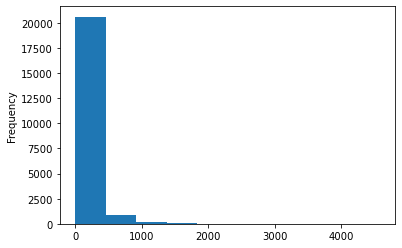

In [75]:
train['text_length'].plot.hist(bins = 10)

# 4) Cleaning - URL & Punctuation Removal

In [76]:
# URLs removal and extra spaces too

train['Comments'] = train['Comments'].apply(lambda x: re.sub(r'https?\S+', '', x).strip())

In [77]:
train.head(10)

,Comment Number,Reply Number,Like Count,Published At,Comments,text_length
0,1.0,NaN,124,2019-01-21T11:04:16Z,For more context on this video:,562
1,NaN,1.0,0,2022-08-20T00:40:51Z,Stopped buying gillete because of this,38
2,NaN,2.0,0,2022-08-16T21:57:02Z,0:36 THE COUNCIL OF MEN APPROVES,32
3,NaN,3.0,0,2022-06-24T09:27:01Z,I love this advertisment.From 2017 to date.,43
4,NaN,4.0,0,2022-04-30T01:04:14Z,The only 'context' you will never find in a Gu...,78
5,NaN,5.0,0,2022-03-26T11:19:21Z,"👍 71k 👎 114k dem people have spoken, step out...",60
6,NaN,6.0,0,2022-03-23T07:58:04Z,-,1
7,NaN,7.0,0,2022-02-09T10:34:26Z,@lethalgiada How you use language shows how de...,83
8,NaN,8.0,0,2022-01-31T22:58:29Z,The Guardian is based confirmed.,32
9,NaN,9.0,0,2021-03-06T18:54:15Z,imagine attacking your target Audience 🤣🤣🤣 Don...,76


In [78]:
##Remove punctuation

import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [79]:
train['Comments'].apply(remove_punctuations)

0                           For more context on this video
1                   Stopped buying gillete because of this
2                          036 THE COUNCIL OF MEN APPROVES
3                I love this advertismentFrom 2017 to date
4        The only context you will never find in a Guar...
                               ...                        
21682                                    eyedownloader Gay
21683                                     davidsirmons Gay
21684                                               Agreed
21685    Odd cause the only hate I see here is from the...
21686                          A wild White Knight appears
Name: Comments, Length: 21687, dtype: object

In [80]:
# Commit to Table
train['Comments'] = train['Comments'].apply(remove_punctuations)

<AxesSubplot:ylabel='Frequency'>

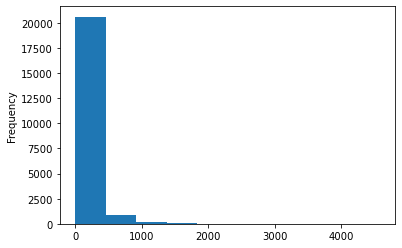

In [81]:
train['text_length'].plot.hist(bins = 10)

# 4) Cleaning - lower case

In [82]:
# Showing only
train['Comments'].apply(lambda x: x.lower())

0                           for more context on this video
1                   stopped buying gillete because of this
2                          036 the council of men approves
3                i love this advertismentfrom 2017 to date
4        the only context you will never find in a guar...
                               ...                        
21682                                    eyedownloader gay
21683                                     davidsirmons gay
21684                                               agreed
21685    odd cause the only hate i see here is from the...
21686                          a wild white knight appears
Name: Comments, Length: 21687, dtype: object

In [83]:
# Commit to Table
train['Comments'] = train['Comments'].apply(lambda x: x.lower())

In [84]:
train.head(20)

,Comment Number,Reply Number,Like Count,Published At,Comments,text_length
0,1.0,NaN,124,2019-01-21T11:04:16Z,for more context on this video,562
1,NaN,1.0,0,2022-08-20T00:40:51Z,stopped buying gillete because of this,38
2,NaN,2.0,0,2022-08-16T21:57:02Z,036 the council of men approves,32
3,NaN,3.0,0,2022-06-24T09:27:01Z,i love this advertismentfrom 2017 to date,43
4,NaN,4.0,0,2022-04-30T01:04:14Z,the only context you will never find in a guar...,78
5,NaN,5.0,0,2022-03-26T11:19:21Z,👍 71k 👎 114k dem people have spoken step out ...,60
6,NaN,6.0,0,2022-03-23T07:58:04Z,,1
7,NaN,7.0,0,2022-02-09T10:34:26Z,lethalgiada how you use language shows how dee...,83
8,NaN,8.0,0,2022-01-31T22:58:29Z,the guardian is based confirmed,32
9,NaN,9.0,0,2021-03-06T18:54:15Z,imagine attacking your target audience 🤣🤣🤣 don...,76


# 5) Cleaning - Remove Stopwords & emoticons & special characters

In [85]:
# Get Stopwords
stop = stopwords.words('english')

In [86]:
# Tokenize and Remove Stop Words
train['Comments'].apply(lambda x: [word for word in x.split() if word not in stop])

0                                         [context, video]
1                               [stopped, buying, gillete]
2                            [036, council, men, approves]
3                     [love, advertismentfrom, 2017, date]
4         [context, never, find, guardian, article, truth]
                               ...                        
21682                                 [eyedownloader, gay]
21683                                  [davidsirmons, gay]
21684                                             [agreed]
21685    [odd, cause, hate, see, fragile, males, upset,...
21686                       [wild, white, knight, appears]
Name: Comments, Length: 21687, dtype: object

In [87]:
train['Comments'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

0                                            context video
1                                   stopped buying gillete
2                                 036 council men approves
3                          love advertismentfrom 2017 date
4                context never find guardian article truth
                               ...                        
21682                                    eyedownloader gay
21683                                     davidsirmons gay
21684                                               agreed
21685    odd cause hate see fragile males upset whats a...
21686                            wild white knight appears
Name: Comments, Length: 21687, dtype: object

In [88]:
# Join the words back
train['Comments'] = train['Comments'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [89]:
train.head(10)

,Comment Number,Reply Number,Like Count,Published At,Comments,text_length
0,1.0,NaN,124,2019-01-21T11:04:16Z,context video,562
1,NaN,1.0,0,2022-08-20T00:40:51Z,stopped buying gillete,38
2,NaN,2.0,0,2022-08-16T21:57:02Z,036 council men approves,32
3,NaN,3.0,0,2022-06-24T09:27:01Z,love advertismentfrom 2017 date,43
4,NaN,4.0,0,2022-04-30T01:04:14Z,context never find guardian article truth,78
5,NaN,5.0,0,2022-03-26T11:19:21Z,👍 71k 👎 114k dem people spoken step yo bubble boa,60
6,NaN,6.0,0,2022-03-23T07:58:04Z,,1
7,NaN,7.0,0,2022-02-09T10:34:26Z,lethalgiada use language shows deep rooted dis...,83
8,NaN,8.0,0,2022-01-31T22:58:29Z,guardian based confirmed,32
9,NaN,9.0,0,2021-03-06T18:54:15Z,imagine attacking target audience 🤣🤣🤣 dont bit...,76


In [90]:
##Remove emoticons

def remove_emoticons(text):
    emoticon_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                           "]+", flags=re.UNICODE)
    return emoticon_pattern.sub(r'', text)



In [91]:

# Apply the remove_emoticons function to the 'Comments' column
train['Comments'] = train['Comments'].apply(remove_emoticons)

In [92]:
train['Comments']

0                                            context video
1                                   stopped buying gillete
2                                 036 council men approves
3                          love advertismentfrom 2017 date
4                context never find guardian article truth
                               ...                        
21682                                    eyedownloader gay
21683                                     davidsirmons gay
21684                                               agreed
21685    odd cause hate see fragile males upset whats a...
21686                            wild white knight appears
Name: Comments, Length: 21687, dtype: object

# 6)Lemmatize

In [93]:
import nltk

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [94]:
from nltk.stem import WordNetLemmatizer


lemmatizer = WordNetLemmatizer()

In [95]:
# Lemmatize
train['Comments'].apply(lambda x: lemmatizer.lemmatize(x))


0                                            context video
1                                   stopped buying gillete
2                                 036 council men approves
3                          love advertismentfrom 2017 date
4                context never find guardian article truth
                               ...                        
21682                                    eyedownloader gay
21683                                     davidsirmons gay
21684                                               agreed
21685    odd cause hate see fragile males upset whats a...
21686                            wild white knight appears
Name: Comments, Length: 21687, dtype: object

In [96]:
# Commit to Table

train['Comments'] = train['Comments'].apply(lambda x: lemmatizer.lemmatize(x))

## 7) POS Tagging

In [97]:
# Download the required NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [98]:
def pos_tagging(text):
    # Tokenize the text into words
    tokens = nltk.word_tokenize(text)
    # Perform POS tagging
    tagged_tokens = nltk.pos_tag(tokens)
    # Return the tagged tokens
    return tagged_tokens

In [99]:
# Apply the POS tagging function to the 'Comments' column
train['POS_Tagged'] = train['Comments'].apply(pos_tagging)

In [100]:
train['POS_Tagged']

0                             [(context, NN), (video, NN)]
1           [(stopped, VBD), (buying, VBG), (gillete, NN)]
2        [(036, CD), (council, NN), (men, NNS), (approv...
3        [(love, NN), (advertismentfrom, NN), (2017, CD...
4        [(context, NN), (never, RB), (find, VBP), (gua...
                               ...                        
21682                     [(eyedownloader, NN), (gay, NN)]
21683                    [(davidsirmons, NNS), (gay, VBP)]
21684                                      [(agreed, VBD)]
21685    [(odd, JJ), (cause, NN), (hate, NN), (see, VBP...
21686    [(wild, JJ), (white, JJ), (knight, NN), (appea...
Name: POS_Tagged, Length: 21687, dtype: object

# 

## 7) NULLs detection

In [119]:

def is_blank(x):
    """
    Returns True if the input string x is blank, False otherwise.
    """
    return str(x).strip() == ''